In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

In [57]:
train = pd.read_csv('csv/House_Price_Prediction_train.csv')
test = pd.read_csv('csv/House_Price_Prediction_test.csv')

In [3]:
train.shape

(1460, 81)

## Treating Missing Values

In [4]:
cm = sns.light_palette("pink", as_cmap=True)
train.head(20).style.background_gradient(cmap=cm)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,B

In [5]:
isnull = train.isnull().sum().sort_values(ascending=False).to_frame()
isnull.columns = ['How_many']
isnull['precentage'] = np.around(((isnull / len(train) * 100)[(isnull / len(train) * 100) != 0]), decimals=2)
isnull[isnull.How_many > 0].style.background_gradient(cmap=cm)

,How_many,precentage
PoolQC,1453,99.520000
MiscFeature,1406,96.300000
Alley,1369,93.770000
Fence,1179,80.750000
FireplaceQu,690,47.260000
LotFrontage,259,17.740000
GarageYrBlt,81,5.550000
GarageCond,81,5.550000
GarageType,81,5.550000
GarageFinish,81,5.550000


### replace the null values in numeric columns with the mean of that column

#### LotFrontage column

In [6]:
train["LotFrontage"].isnull().sum()

259

In [7]:
train['LotFrontage'].fillna(int(train['LotFrontage'].mean()), inplace=True)

In [8]:
train["LotFrontage"].isnull().sum()

0

#### GarageYrBlt column

In [9]:
train["GarageYrBlt"].isnull().sum()

81

In [10]:
train['GarageYrBlt'].fillna(int(train['GarageYrBlt'].mean()), inplace=True)

In [11]:
train["GarageYrBlt"].isnull().sum()

0

### drop null values in the columns that has a total number of missing data > 5

In [59]:
number_of_missing = train.isnull().sum().sort_values()
percent_of_missing = ((train.isnull().sum() / train.isnull().count())*100).sort_values()
missing_train_df = pd.concat([number_of_missing,  percent_of_missing], keys = ['total number of missing data', 'total percent of missing data'], axis = 1)
train = train.drop((missing_train_df[missing_train_df['total number of missing data'] > 5]).index, axis = 1)
train.isnull().sum().sort_values(ascending = False)


number_of_missing = test.isnull().sum().sort_values()
percent_of_missing = ((test.isnull().sum() / test.isnull().count())*100).sort_values()
missing_test_df = pd.concat([number_of_missing,  percent_of_missing], keys = ['total number of missing data', 'total percent of missing data'], axis = 1)
test = test.drop((missing_test_df[missing_test_df['total number of missing data'] > 5]).index, axis = 1)
test.isnull().sum().sort_values(ascending = False)

BsmtFullBath     2
BsmtHalfBath     2
GarageCars       1
TotalBsmtSF      1
BsmtUnfSF        1
                ..
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
SaleCondition    0
Length: 62, dtype: int64

### the columns that has <5 null values, we choose the most repeated value and fill the missing data with it

In [13]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
train['Electrical'].fillna(train['Electrical'].value_counts().index[0], inplace = True)

## which feature has the maximum correlation with the Sale Price of the house?

In [15]:
max = 0
x=0
for i in train.select_dtypes(include=np.number).drop(['SalePrice'],axis=1).columns:
    if (train[i].corr(train['SalePrice'])) > max:
        max = train[i].corr(train['SalePrice'])
        x = i
print("The column which has the maximum correlation with the SalePrice is: {0}" .format(x))

The column which has the maximum correlation with the SalePrice is: OverallQual


## Unique value in each columns

In [16]:
arr=[]
for i in train.columns:
    arr.append(len(train[i].value_counts()))
value_counts_df = pd.concat([pd.Series(train.columns), pd.Series(arr)], keys = ['column name', 'number of unique values in that column'], axis = 1)

value_counts_df

,column name,number of unique values in that column
0,Id,1460
1,MSSubClass,15
2,MSZoning,5
3,LotFrontage,110
4,LotArea,1073
...,...,...
60,MoSold,12
61,YrSold,5
62,SaleType,9
63,SaleCondition,6


In [17]:
value_counts_df.sort_values('number of unique values in that column').head(23)

,column name,number of unique values in that column
33,CentralAir,2
5,Street,2
8,Utilities,2
42,HalfBath,3
52,PavedDrive,3
40,BsmtHalfBath,3
10,LandSlope,3
45,KitchenQual,4
24,ExterQual,4
48,Fireplaces,4


## what is the relation between Overall material and finish quality, sale price depending on Overall condition rating?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


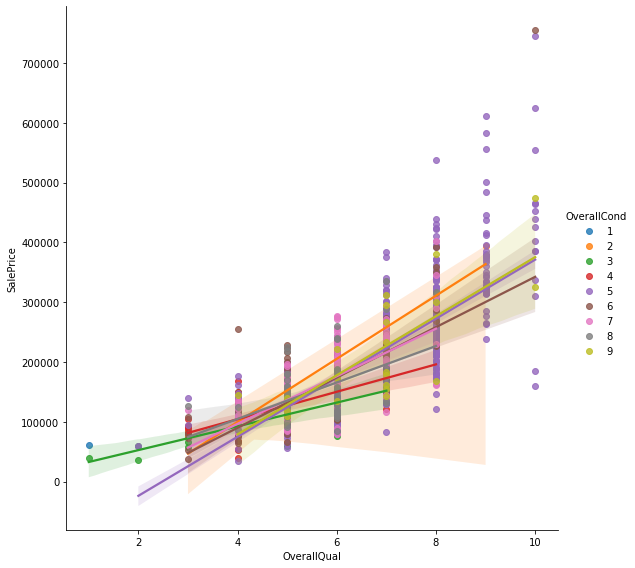

In [18]:
sns.lmplot(x='OverallQual', y='SalePrice', data=train ,hue='OverallCond',size=8)

## relation between grade (ground) living area square feet and Sale Price depending on general zoning

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


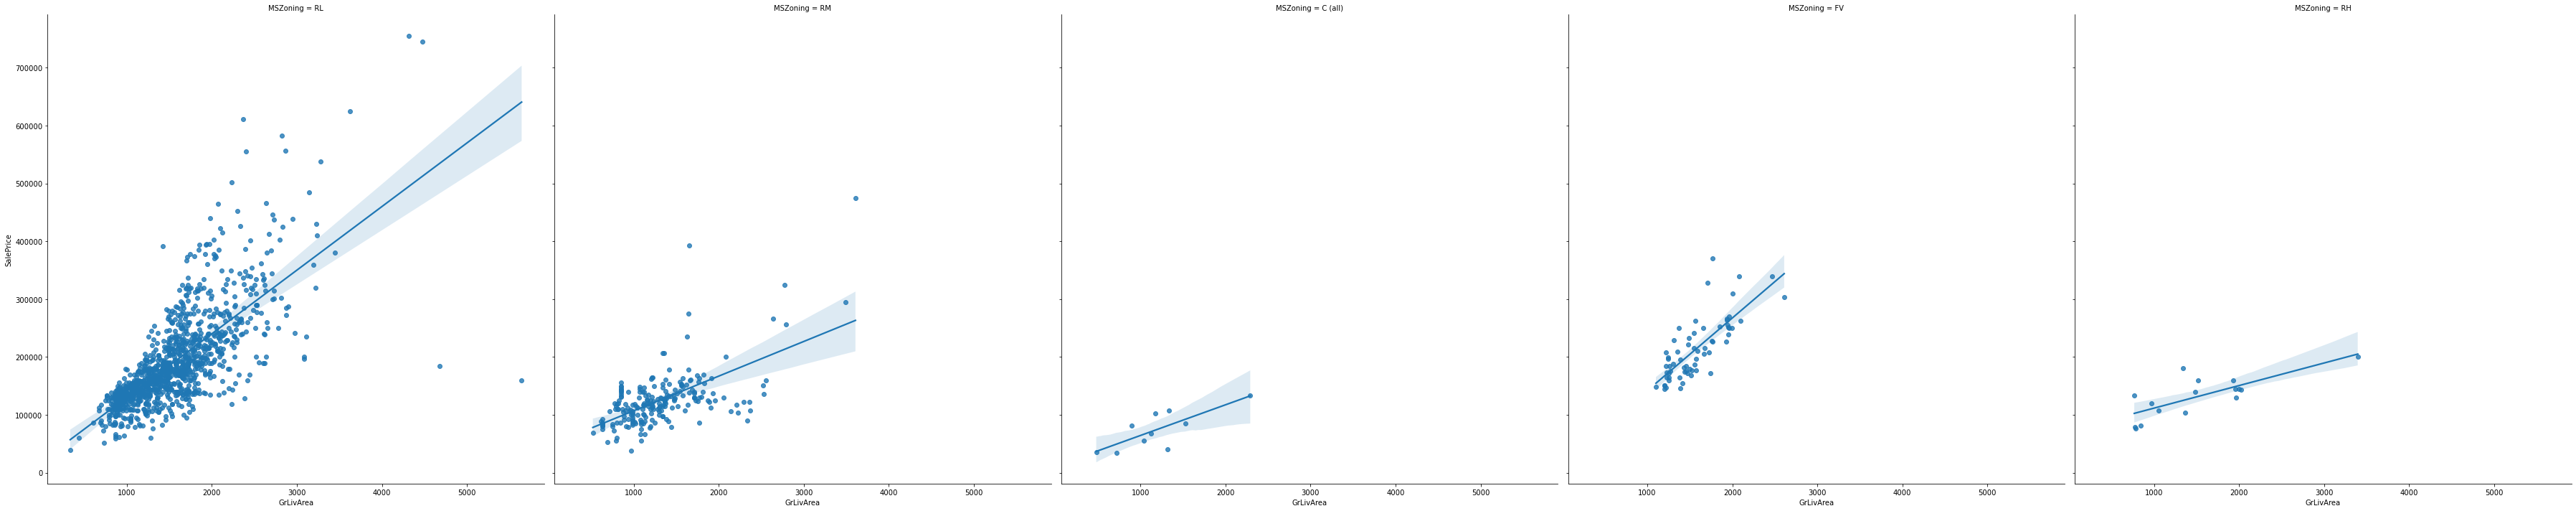

In [19]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train,col='MSZoning',size=10)

# Univariate Analysis
### Numerical variables:

In [20]:
n_val = train.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
l=[]
for i in n_val:
  l.append(i)
print("Total no of numerical variables:",len(l))

Total no of numerical variables: 36


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


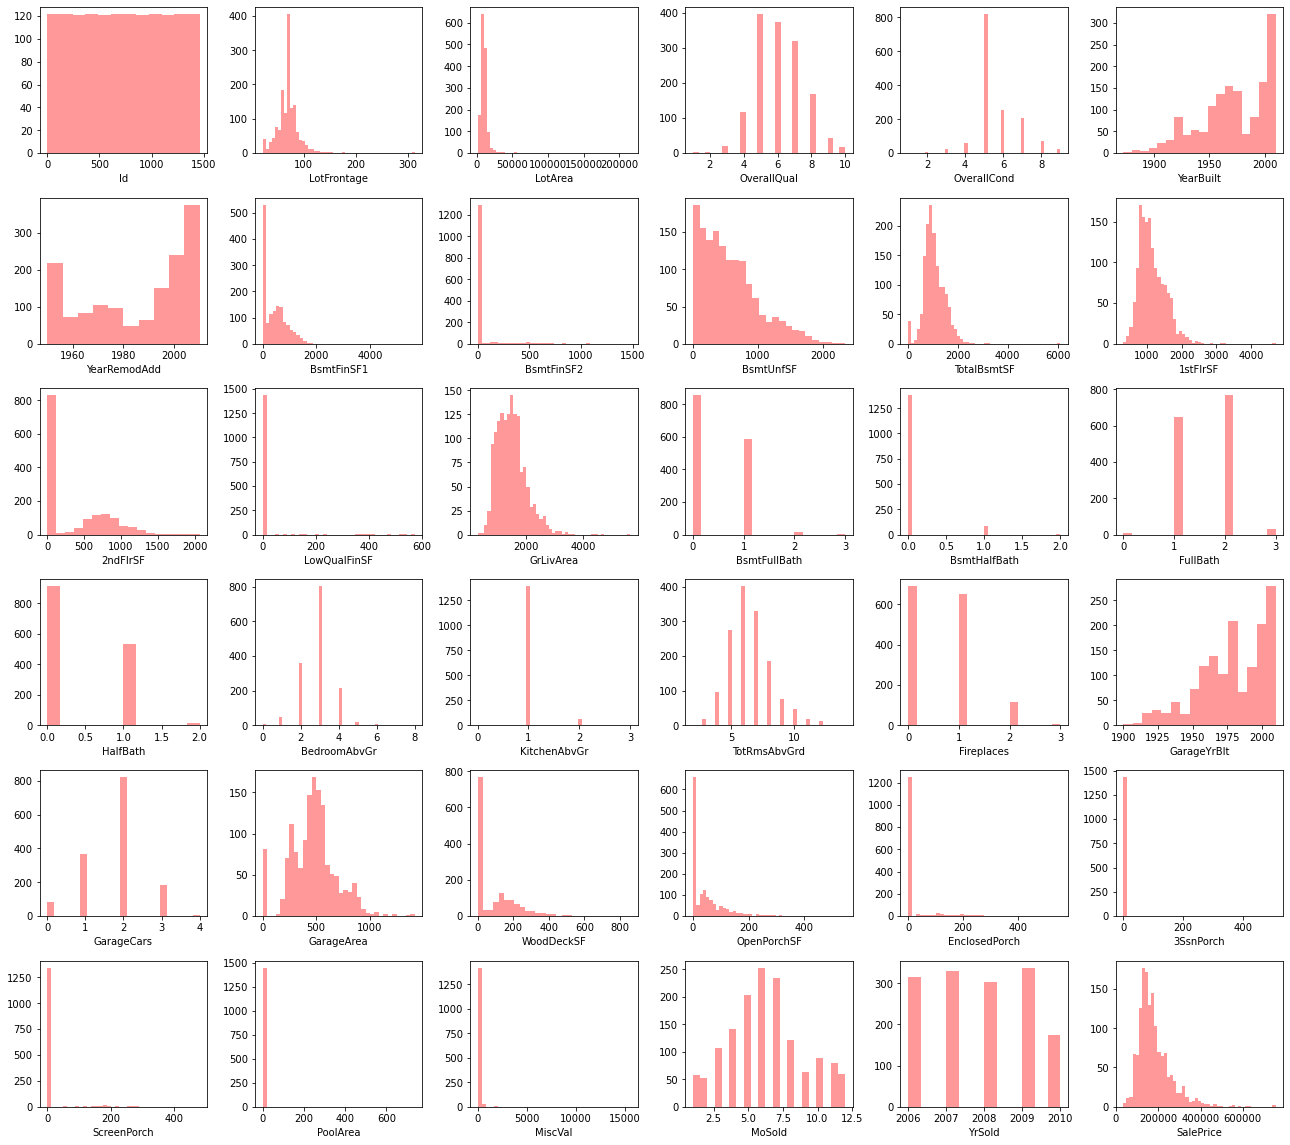

In [21]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(n_val):
    plt.subplot(6,6,index+1)
    sns.distplot(n_val.loc[:,col].dropna(), kde=False,color='r')
fig.tight_layout(pad=1.0)

- From the given plots we can tell that certain numerical variables have only one kind of value:
    - BsmtFitSF2
    - LowQualFinSF
    - BSMHalfBath
    - KitchenAbvGr
    - EnclosedPorch
    - 3snPorch
    - Screen Porch
    - PoolArea
    - MiscVal

## Categorical Variables

In [22]:
c_val = train.select_dtypes(include=['object']).copy()
c_val['MSSubClass'] = train['MSSubClass']
print(c_val.columns)
l=[]
for i in c_val:
  l.append(i)
print("Total no of categorical variables:",len(l))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
Total no of categorical variables: 29


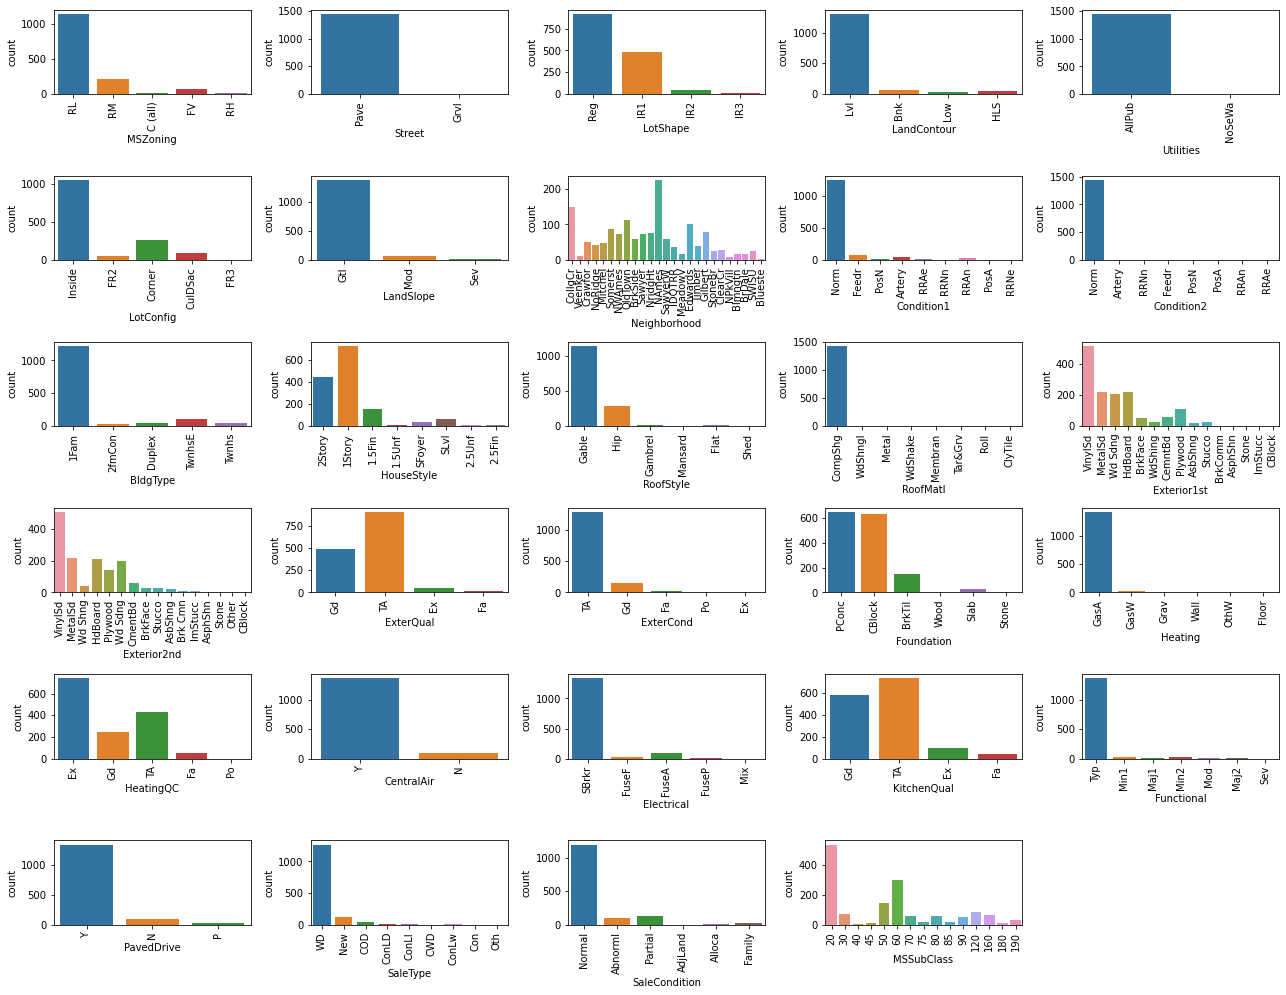

In [23]:
fig = plt.figure(figsize=(18,20))
for index in range(len(c_val.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=c_val.iloc[:,index], data=c_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

- From the given plots we can tell that certain categorical features have only one kind of value:

    - Condition2
    - Street 
    - RoofMatl
    - Utilites
    - Heating

# Bivariate Analysis:

<AxesSubplot:>

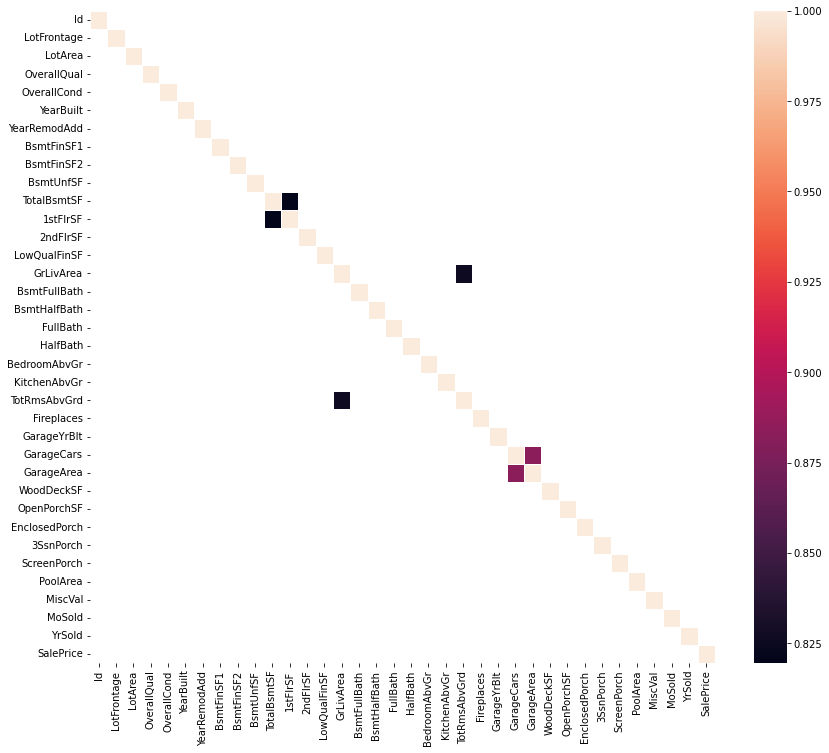

In [24]:
plt.figure(figsize=(14,12))
correlation = n_val.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)

#### From the given correlation matrix we can infer the highly correlated features:
    - 1stfirSF AND TotalBsmtSf
    - TotRmsAbvGrd AND GrLivArea
    - GarageArea AND GarageCars

### We need to find the numerical features which have high correlation to the target variable 'SalePrice'

In [25]:
nfeatures_corr = n_val.corr()['SalePrice'][:-1]
# nfeatures_corr[abs(nfeatures_corr)>0.5]
high_fealist = nfeatures_corr[abs(nfeatures_corr)> 0.5].sort_values(ascending=False)
print("HIGHLY CORRELATED FEATURES:\n")
print(high_fealist)

HIGHLY CORRELATED FEATURES:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


###  Finding the relation between the numerical features and the target variables:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


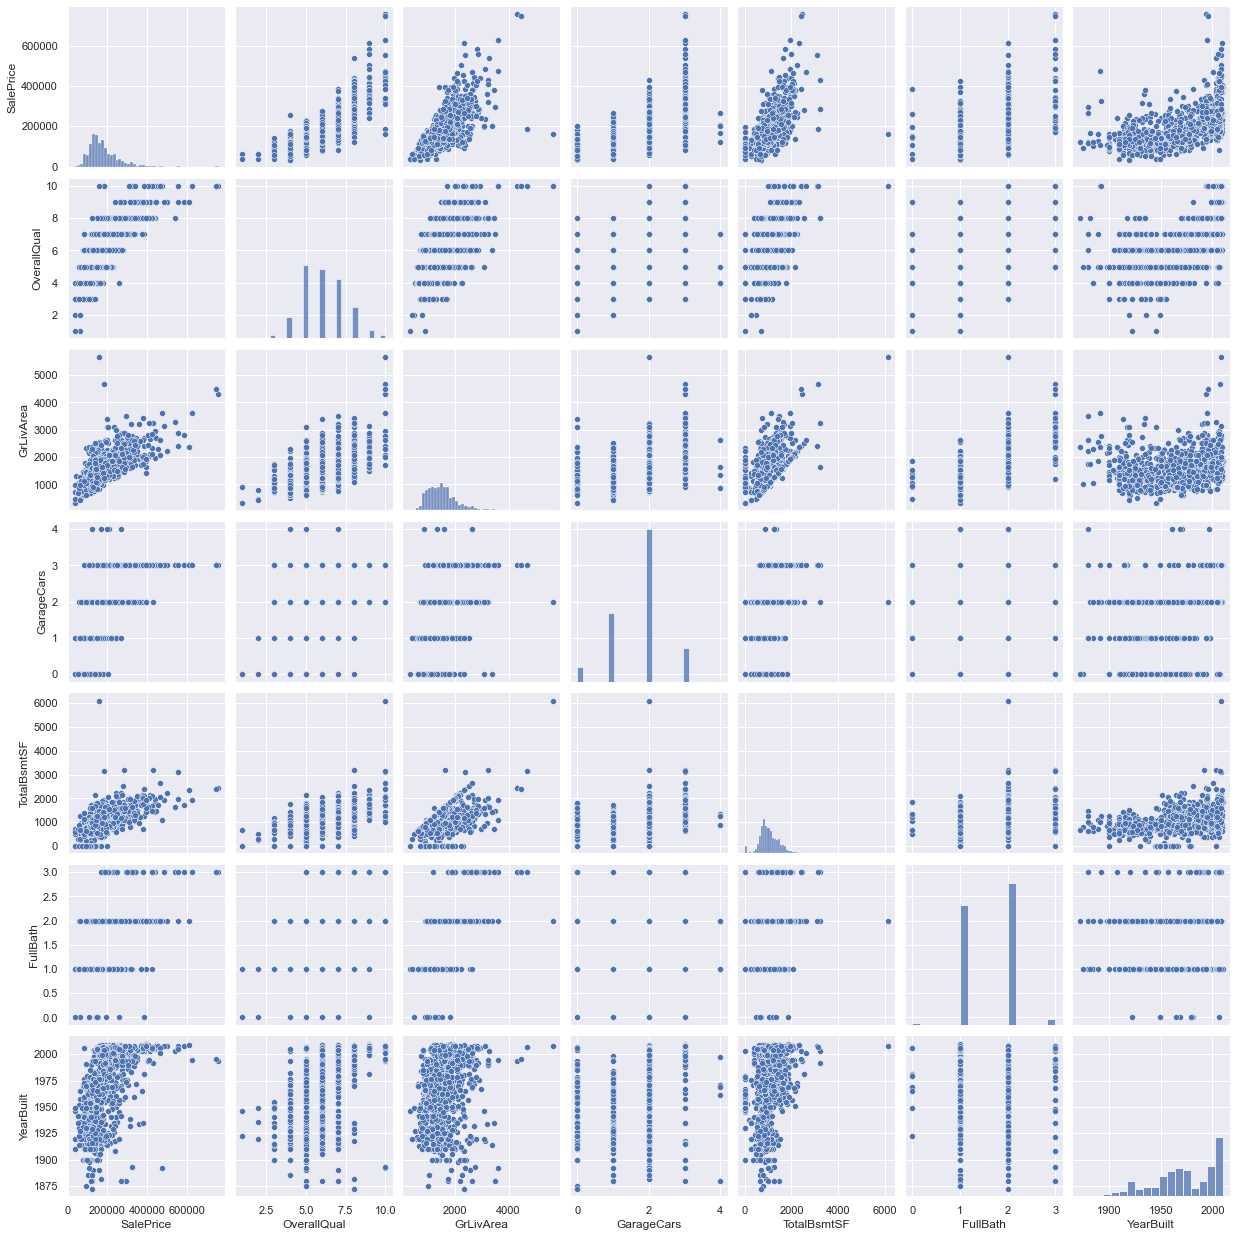

In [26]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();


In [27]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0
GrLivArea,0,0.0
BsmtFullBath,0,0.0
BsmtHalfBath,0,0.0
FullBath,0,0.0
HalfBath,0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


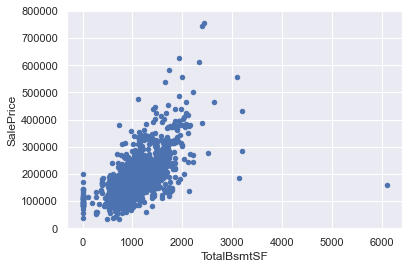

In [28]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


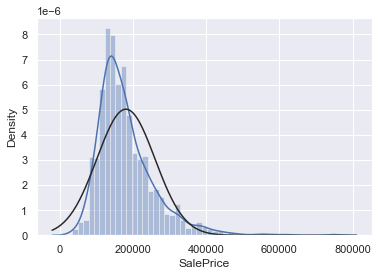

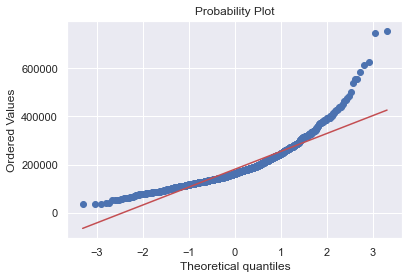

In [29]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


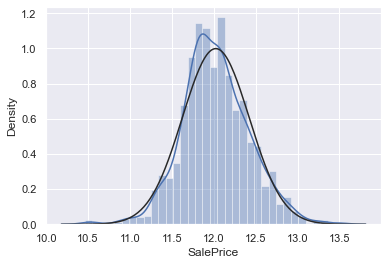

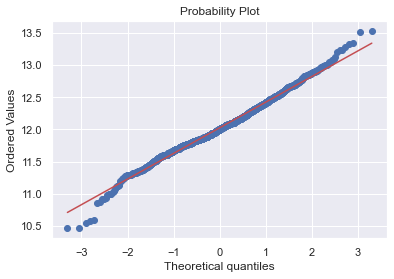

In [31]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train["SalePrice"],fit=norm)
fig = plt.figure();
res = stats.probplot(train["SalePrice"],plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


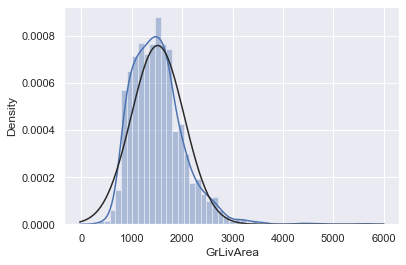

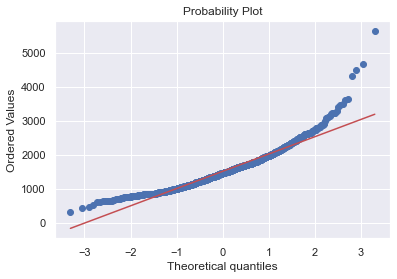

In [32]:
sns.distplot(train["GrLivArea"],fit=norm)
fig = plt.figure()
res = stats.probplot(train["GrLivArea"],plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


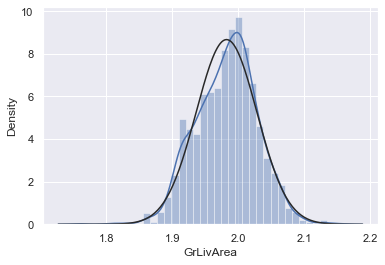

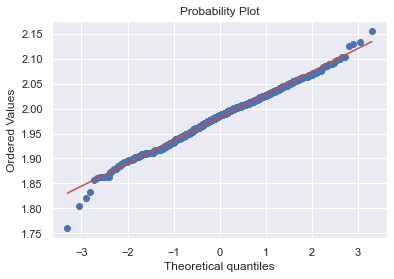

In [34]:
train['GrLivArea'] = np.log(train['GrLivArea'])

sns.distplot(train["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(train["GrLivArea"],plot=plt)

In [39]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 65, dtype: object

In [40]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


## Encoding data

In [45]:
for i in train.columns:
    print(i+" :", len(train[i].unique()))

Id : 1460
MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
GarageYrBlt : 97
GarageCars : 5
GarageArea : 441
PavedDrive : 3
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
3SsnPorch : 20
ScreenPorch : 76
PoolArea : 8
MiscVal : 21
MoSold : 12
YrSold : 5
SaleType : 9
SaleCondition : 6
SalePrice : 663


In [55]:
label_encoder = preprocessing.LabelEncoder()

train['MSZoning'] = label_encoder.fit_transform(train['MSZoning'])
train['Street'] = label_encoder.fit_transform(train['Street'])
train['LotShape'] = label_encoder.fit_transform(train['LotShape'])
train['LandContour'] = label_encoder.fit_transform(train['LandContour'])
train['Utilities'] = label_encoder.fit_transform(train['Utilities'])
train['LotConfig'] = label_encoder.fit_transform(train['LotConfig'])
train['LandSlope'] = label_encoder.fit_transform(train['LandSlope'])
train['Neighborhood'] = label_encoder.fit_transform(train['Neighborhood'])
train['Condition1'] = label_encoder.fit_transform(train['Condition1'])
train['Condition2'] = label_encoder.fit_transform(train['Condition2'])
train['BldgType'] = label_encoder.fit_transform(train['BldgType'])
train['HouseStyle'] = label_encoder.fit_transform(train['HouseStyle'])
train['RoofStyle'] = label_encoder.fit_transform(train['RoofStyle'])
train['RoofMatl'] = label_encoder.fit_transform(train['RoofMatl'])
train['Exterior1st'] = label_encoder.fit_transform(train['Exterior1st'])
train['Exterior2nd'] = label_encoder.fit_transform(train['Exterior2nd'])
train['ExterQual'] = label_encoder.fit_transform(train['ExterQual'])
train['ExterCond'] = label_encoder.fit_transform(train['ExterCond'])
train['Foundation'] = label_encoder.fit_transform(train['Foundation'])
train['Heating'] = label_encoder.fit_transform(train['Heating'])
train['HeatingQC'] = label_encoder.fit_transform(train['HeatingQC'])
train['CentralAir'] = label_encoder.fit_transform(train['CentralAir'])
train['Electrical'] = label_encoder.fit_transform(train['Electrical'])
train['KitchenQual'] = label_encoder.fit_transform(train['KitchenQual'])
train['Functional'] = label_encoder.fit_transform(train['Functional'])
train['PavedDrive'] = label_encoder.fit_transform(train['PavedDrive'])
train['SaleType'] = label_encoder.fit_transform(train['SaleType'])
train['SaleCondition'] = label_encoder.fit_transform(train['SaleCondition'])

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [58]:
test['MSZoning'] = label_encoder.fit_transform(test['MSZoning'])
test['Street'] = label_encoder.fit_transform(test['Street'])
test['LotShape'] = label_encoder.fit_transform(test['LotShape'])
test['LandContour'] = label_encoder.fit_transform(test['LandContour'])
test['Utilities'] = label_encoder.fit_transform(test['Utilities'])
test['LotConfig'] = label_encoder.fit_transform(test['LotConfig'])
test['LandSlope'] = label_encoder.fit_transform(test['LandSlope'])
test['Neighborhood'] = label_encoder.fit_transform(test['Neighborhood'])
test['Condition1'] = label_encoder.fit_transform(test['Condition1'])
test['Condition2'] = label_encoder.fit_transform(test['Condition2'])
test['BldgType'] = label_encoder.fit_transform(test['BldgType'])
test['HouseStyle'] = label_encoder.fit_transform(test['HouseStyle'])
test['RoofStyle'] = label_encoder.fit_transform(test['RoofStyle'])
test['RoofMatl'] = label_encoder.fit_transform(test['RoofMatl'])
test['Exterior1st'] = label_encoder.fit_transform(test['Exterior1st'])
test['Exterior2nd'] = label_encoder.fit_transform(test['Exterior2nd'])
test['ExterQual'] = label_encoder.fit_transform(test['ExterQual'])
test['ExterCond'] = label_encoder.fit_transform(test['ExterCond'])
test['Foundation'] = label_encoder.fit_transform(test['Foundation'])
test['Heating'] = label_encoder.fit_transform(test['Heating'])
test['HeatingQC'] = label_encoder.fit_transform(test['HeatingQC'])
test['CentralAir'] = label_encoder.fit_transform(test['CentralAir'])
test['Electrical'] = label_encoder.fit_transform(test['Electrical'])
test['KitchenQual'] = label_encoder.fit_transform(test['KitchenQual'])
test['Functional'] = label_encoder.fit_transform(test['Functional'])
test['PavedDrive'] = label_encoder.fit_transform(test['PavedDrive'])
test['SaleType'] = label_encoder.fit_transform(test['SaleType'])
test['SaleCondition'] = label_encoder.fit_transform(test['SaleCondition'])



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,NaN,3,3,0,...,120,0,NaN,MnPrv,NaN,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,NaN,0,3,0,...,0,0,NaN,NaN,Gar2,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,NaN,0,3,0,...,0,0,NaN,MnPrv,NaN,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,NaN,0,3,0,...,0,0,NaN,NaN,NaN,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,NaN,0,1,0,...,144,0,NaN,NaN,NaN,0,1,2010,8,4


In [60]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


## Spliting Data

In [61]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [62]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

3

In [64]:
corr_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [65]:
X_corr = X.drop(corr_features,axis=1)
X_corr

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [66]:
test_data = test.drop(corr_features, axis=1)
test_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [69]:
x_train, x_test,y_train,y_test = train_test_split(X_corr,y,test_size =0.3)

# print the data
x_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1452,1453,180,RM,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,28,0,0,0,0,0,5,2006,WD,Normal
1006,1007,20,RL,12155,Pave,IR3,Lvl,AllPub,Inside,Gtl,...,0,0,0,147,0,0,3,2007,WD,Normal
1328,1329,50,RM,10440,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,547,0,0,480,0,1150,6,2008,WD,Normal
622,623,20,RL,7064,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2009,WD,Normal
446,447,20,RL,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,6,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,20,RL,12416,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,11,2008,WD,Normal
887,888,50,RL,16466,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,265,0,0,4,2008,WD,Normal
746,747,60,RL,8795,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,54,0,0,0,0,0,4,2009,WD,Normal
67,68,20,RL,10665,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,29,0,0,0,0,0,6,2007,WD,Normal


In [70]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (1022, 59)
x_test:  (438, 59)
y_train:  (1022,)
y_test:  (438,)


# Random Forest reg

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
model = RandomForestRegressor(criterion='mae', n_estimators=38, random_state=20)
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'RM'